### Big Market Sales Prediction

2013 sales data for 1559 products across 10 stores in different cities

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


#### Load Data

In [2]:
df_train = pd.read_csv('data/train_v9rqX0R.csv') #We split it to (x_train,y_train), (x_test,y_test), 80:20 Split
df_test  = pd.read_csv('data/test_AbJTz2l.csv') #We test final model on this data

In [3]:
df_train.shape, df_test.shape

((8523, 12), (5681, 11))

#### Training Data Deep Dive

In [4]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##### Data information

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Null Count

In [6]:
print(df_train.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


##### Statistical Insights

In [7]:
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Item_Identifier,8523,1559,FDW13,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Weight,7060.0,NaN,NaN,NaN,12.857645,4.643456,4.555,8.77375,12.6,16.85,21.35
Item_Fat_Content,8523,5,Low Fat,5089,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_Visibility,8523.0,NaN,NaN,NaN,0.066132,0.051598,0.0,0.026989,0.053931,0.094585,0.328391
Item_Type,8523,16,Fruits and Vegetables,1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item_MRP,8523.0,NaN,NaN,NaN,140.992782,62.275067,31.29,93.8265,143.0128,185.6437,266.8884
Outlet_Identifier,8523,10,OUT027,935,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Establishment_Year,8523.0,NaN,NaN,NaN,1997.831867,8.37176,1985.0,1987.0,1999.0,2004.0,2009.0
Outlet_Size,6113,3,Medium,2793,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outlet_Location_Type,8523,3,Tier 3,3350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Feature: Item_Code

In [8]:
df_train['Item_Code'] = df_train['Item_Identifier'].str[:3]
df_test['Item_Code'] = df_test['Item_Identifier'].str[:3]
print(len(df_train['Item_Code'].unique()))
df_train['Item_Code'].unique()

71


array(['FDA', 'DRC', 'FDN', 'FDX', 'NCD', 'FDP', 'FDO', 'FDH', 'FDU',
       'FDY', 'FDS', 'FDF', 'NCB', 'DRI', 'FDW', 'FDC', 'FDR', 'FDV',
       'DRJ', 'FDE', 'NCS', 'DRH', 'NCX', 'DRZ', 'FDB', 'FDK', 'FDL',
       'FDM', 'NCP', 'NCL', 'DRK', 'FDI', 'FDZ', 'NCI', 'FDJ', 'FDG',
       'NCZ', 'FDQ', 'FDD', 'DRG', 'NCR', 'FDT', 'DRB', 'DRE', 'DRA',
       'NCF', 'NCH', 'NCO', 'NCN', 'NCC', 'DRD', 'DRF', 'DRL', 'NCM',
       'NCU', 'DRY', 'NCW', 'DRM', 'NCT', 'NCQ', 'DRP', 'DRQ', 'NCK',
       'NCY', 'DRN', 'NCA', 'NCE', 'NCJ', 'NCV', 'NCG', 'DRO'],
      dtype=object)

Handling Null Value in Item_Weight

In [9]:
item_code_weight_medians = df_train.groupby('Item_Code')['Item_Weight'].median()
global_weight_median = df_train['Item_Weight'].median()

def impute_weight(row):
    if pd.isna(row['Item_Weight']):
        return item_code_weight_medians.get(row['Item_Code'], global_weight_median)
    return row['Item_Weight']

df_train['Item_Weight'] = df_train.apply(impute_weight, axis=1)
df_test['Item_Weight'] = df_test.apply(impute_weight, axis=1)

Handling Null Value in Outlet Size

In [10]:
# 1. Safe mode function
def safe_mode(series):
    mode_vals = series.mode()
    if len(mode_vals) > 0:
        return mode_vals.iloc[0]
    else:
        return 'Medium'

# 2. Compute outlet_size_mode safely
outlet_size_mode = df_train.groupby(['Outlet_Type', 'Outlet_Location_Type'])['Outlet_Size'].agg(safe_mode)

# 3. Imputation function
def impute_outlet_size(row):
    if pd.isna(row['Outlet_Size']):
        return outlet_size_mode.get(
            (row['Outlet_Type'], row['Outlet_Location_Type']),
            'Medium'  # fallback if combination not found
        )
    return row['Outlet_Size']

# 4. Apply to both train and test
df_train['Outlet_Size'] = df_train.apply(impute_outlet_size, axis=1)
df_test['Outlet_Size'] = df_test.apply(impute_outlet_size, axis=1)


#### Exploring Categorical Columns

In [11]:
categorical_cols = df_train.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Code']


##### Checking For Irregular Values in columns

In [12]:
print(df_train['Item_Fat_Content'].unique())
print(df_train['Item_Type'].unique())
print(df_train['Outlet_Identifier'].unique())
print(df_train['Outlet_Size'].unique())
print(df_train['Outlet_Location_Type'].unique())
print(df_train['Outlet_Type'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
['Medium' 'High' 'Small']
['Tier 1' 'Tier 3' 'Tier 2']
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


##### Handling Inconsistent value in Item_Fat_Content

In [13]:
#Train Data
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({'reg': 'Regular', 'LF': 'Low Fat', 'low fat': 'Low Fat', })
print(df_train['Item_Fat_Content'].value_counts())

#Test Data
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({'reg': 'Regular', 'LF': 'Low Fat', 'low fat': 'Low Fat', })
print(df_test['Item_Fat_Content'].value_counts())


Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64
Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64


Analyzing Features

Item_Outlet_Sales Distribution

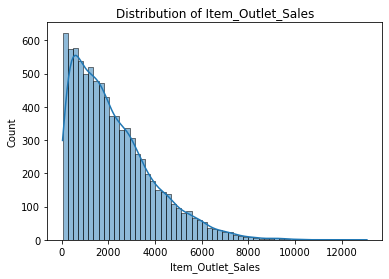

In [14]:
sns.histplot(df_train['Item_Outlet_Sales'], kde=True)
plt.title("Distribution of Item_Outlet_Sales")
plt.show()


Applying Log on Item_Outlet_Sales

In [15]:

df_train['Log_Sales'] = np.log1p(df_train['Item_Outlet_Sales'])

#After prediction, invertion is required - 
# pred_sales = np.expm1(model.predict(X_test))



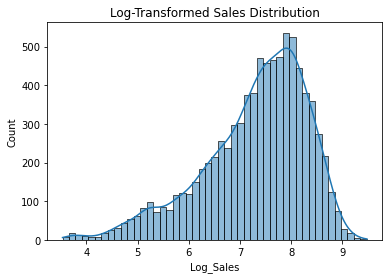

In [16]:
sns.histplot(df_train['Log_Sales'], kde=True)
plt.title("Log-Transformed Sales Distribution")
plt.show()

Item_MRP vs Item_Outlet_Sales

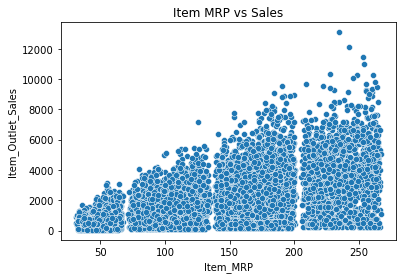

In [17]:
# MRP vs Sales
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df_train)
plt.title("Item MRP vs Sales")
plt.show()

Item_Visibility vs Item_Outlet_Sales

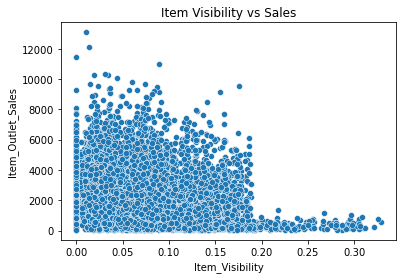

In [18]:
# Item_Visibility vs Sales
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df_train)
plt.title("Item Visibility vs Sales")
plt.show()


In [19]:
#Total Items with 0 visibility
(df_train['Item_Visibility'] == 0).sum()

526

In [20]:
# Total Unique Items with 0 visibility
unique_items_zero_visibility = df_train[df_train['Item_Visibility'] == 0]['Item_Identifier'].unique()
print(len(unique_items_zero_visibility))
# print(unique_items_zero_visibility)


446


Handling 0 Item_Visibility

In [21]:
# Compute item-level and item+outlet-level medians (ignoring 0s)
'''  
We see more than 6% data points have item_visibility = 0
This appears to be an error in the data.
To handle this we try to impute item_visibility based on the data we have.
If item visibility of an item in an outlet is 0, we first try to scheck median item visibility of item,outlet combination and replace it with it.
If item, outlet combination doesnt exist, we try to impute with the median of the item's visibility.
If that too doesn't exist we impute it with global item visibility.
'''
item_medians = df_train[df_train['Item_Visibility'] > 0].groupby(
    'Item_Identifier')['Item_Visibility'].median()

item_outlet_medians = df_train[df_train['Item_Visibility'] > 0].groupby(
    ['Item_Identifier', 'Outlet_Identifier']
)['Item_Visibility'].median()

# Define fallback median
global_median = df_train[df_train['Item_Visibility'] > 0]['Item_Visibility'].median()

# Function to fill visibility
def fill_visibility(row):
    if row['Item_Visibility'] == 0:
        return item_outlet_medians.get(
            (row['Item_Identifier'], row['Outlet_Identifier']),
            item_medians.get(
                row['Item_Identifier'],
                global_median
            )
        )
    return row['Item_Visibility']

#Lets first preserve the existing visibility = 0 value 
df_train['Is_Visibility_Zero'] = (df_train['Item_Visibility'] == 0).astype(int)
df_test['Is_Visibility_Zero'] = (df_test['Item_Visibility'] == 0).astype(int)

# Applying function to each row
df_train['Item_Visibility'] = df_train.apply(fill_visibility, axis=1)
df_test['Item_Visibility'] = df_test.apply(fill_visibility,axis=1)

#Applying Log Transform to handle skewness
df_train['Log_Visibility'] = np.log1p(df_train['Item_Visibility'])
df_test['Log_Visibility'] = np.log1p(df_test['Item_Visibility'])



Item_Weight vs Item_Outlet_Sales

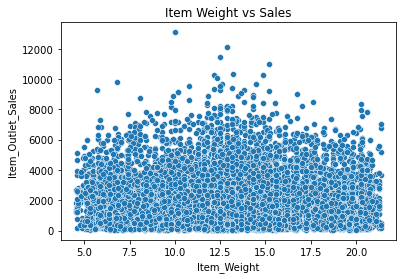

In [22]:
# MRP vs Sales
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df_train)
plt.title("Item Weight vs Sales")
plt.show()

Categorical Feature Analysis

Item_Type vs Item_Outlet_Sales

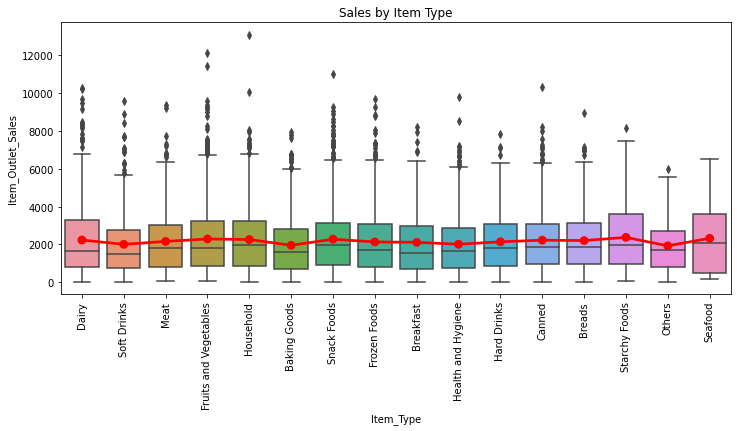

In [23]:
plt.figure(figsize=(12,5))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df_train)
sns.pointplot(x='Item_Type', y='Item_Outlet_Sales', data=df_train, color='red', ci=None)
plt.xticks(rotation=90)
plt.title("Sales by Item Type")
plt.show()


Outlet Type vs Item_Outlet_Sales

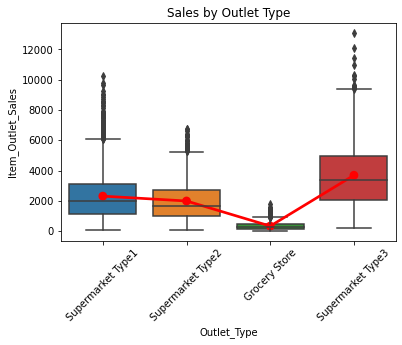

In [24]:
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df_train)
plt.title("Sales by Outlet Type")
sns.pointplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df_train, color='red', ci=None)
plt.xticks(rotation=45)
plt.show()


Outlet_Location_Type vs Item_Outlet_Sales

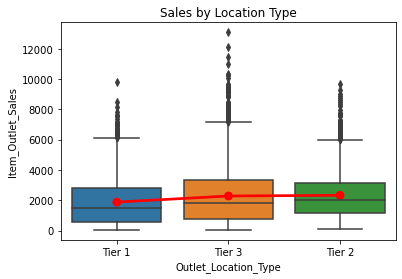

In [25]:
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df_train)
plt.title("Sales by Location Type")
sns.pointplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df_train, color='red', ci=None)
plt.show()


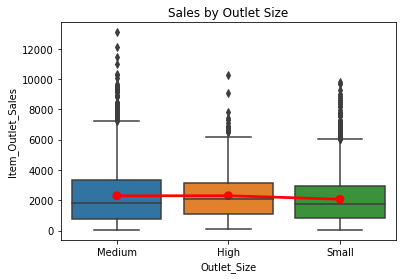

In [26]:
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df_train)
plt.title("Sales by Outlet Size")
sns.pointplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df_train, color='red', ci=None)
plt.show()

Creating Additional Features

In [27]:
# Categorizing items
item_type_map = {
    'Dairy': 'Perishables',
    'Meat': 'Perishables',
    'Fruits and Vegetables': 'Perishables',
    'Seafood': 'Perishables',
    
    'Soft Drinks': 'Beverages',
    'Hard Drinks': 'Beverages',
    
    'Snack Foods': 'Processed Foods',
    'Frozen Foods': 'Processed Foods',
    'Baking Goods': 'Processed Foods',
    'Breakfast': 'Processed Foods',
    'Starchy Foods': 'Processed Foods',
    'Breads': 'Processed Foods',
    'Canned': 'Processed Foods',
    
    'Household': 'Non-Food',
    'Health and Hygiene': 'Non-Food',
    
    'Others': 'Misc'
}


In [28]:
df_train['Item_Type_Cluster'] = df_train['Item_Type'].map(item_type_map)
df_test['Item_Type_Cluster'] = df_test['Item_Type'].map(item_type_map)

Feature - outlet_type_item_type

In [29]:
# Creating new feature : outlet_type_item_type
df_train['outlet_type_item_type'] = df_train['Outlet_Type'].astype(str) + '_' + df_train['Item_Type_Cluster'].astype(str)
df_test['outlet_type_item_type'] = df_test['Outlet_Type'].astype(str) + '_' + df_test['Item_Type_Cluster'].astype(str)


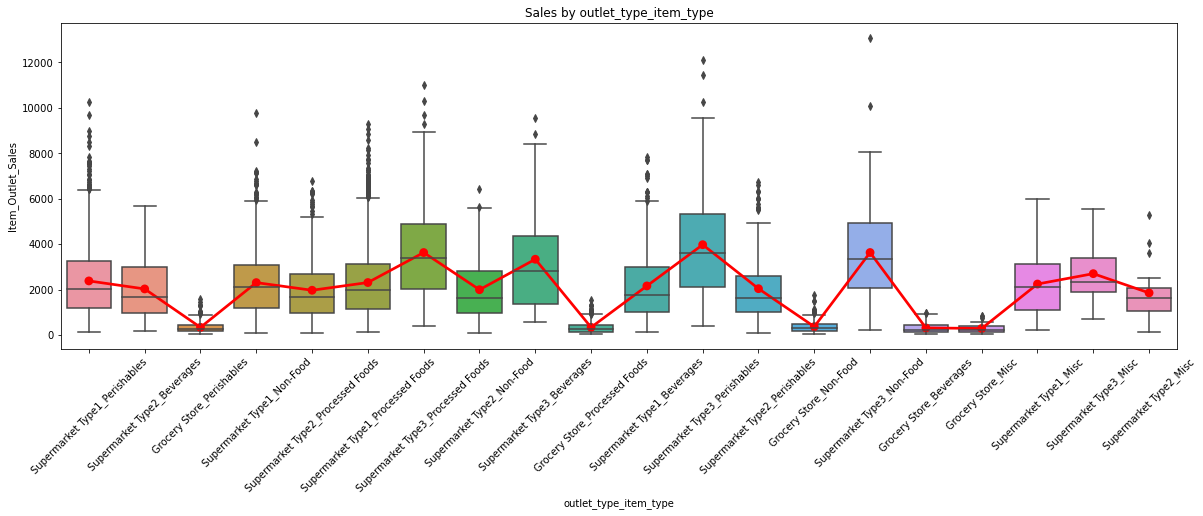

In [30]:

plt.figure(figsize=(20, 6))
sns.boxplot(x='outlet_type_item_type', y='Item_Outlet_Sales', data=df_train)
plt.title("Sales by outlet_type_item_type")
sns.pointplot(x='outlet_type_item_type', y='Item_Outlet_Sales', data=df_train, color='red', ci=None)
plt.xticks(rotation=45)
plt.show()

Feature : outlet_location_outlet_type_item_type

In [31]:
# Creating new feature : outlet_location_outlet_type_item_type
df_train['outlet_location_outlet_type_item_type'] = df_train['Outlet_Location_Type'].astype(str)+'_'+df_train['Outlet_Type'].astype(str) + '_' + df_train['Item_Type_Cluster'].astype(str)
df_test['outlet_location_outlet_type_item_type'] = df_test['Outlet_Location_Type'].astype(str)+'_'+df_test['Outlet_Type'].astype(str) + '_' + df_test['Item_Type_Cluster'].astype(str)


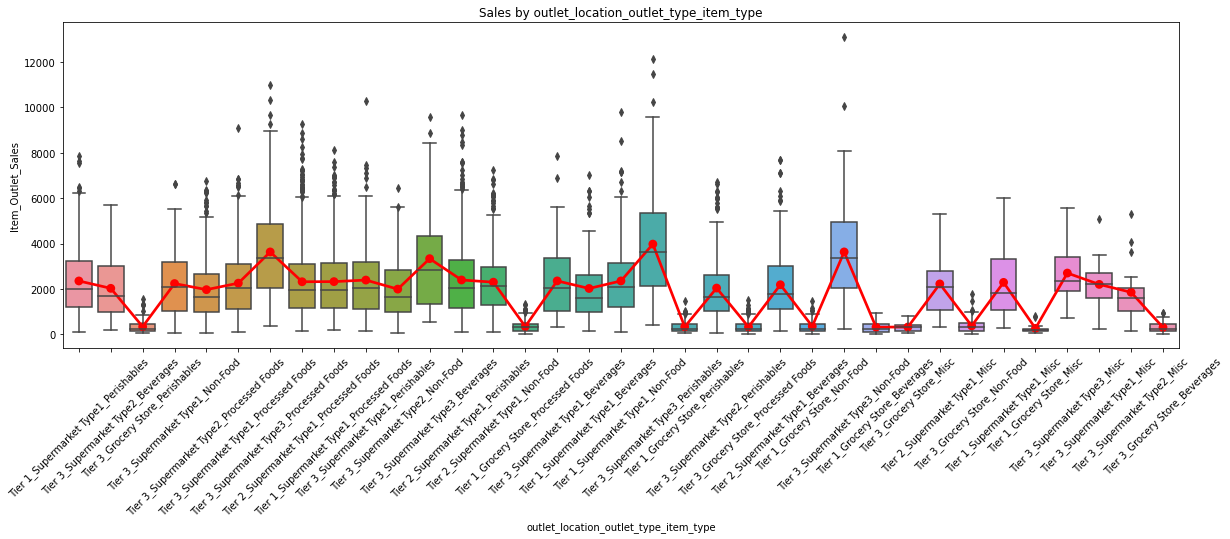

In [32]:

plt.figure(figsize=(20, 6))
sns.boxplot(x='outlet_location_outlet_type_item_type', y='Item_Outlet_Sales', data=df_train)
plt.title("Sales by outlet_location_outlet_type_item_type")
sns.pointplot(x='outlet_location_outlet_type_item_type', y='Item_Outlet_Sales', data=df_train, color='red', ci=None)
plt.xticks(rotation=45)
plt.show()

In [33]:
# Creating new feature : outlet_location_outlet_type_item_type_item_fat_content
df_train['outlet_location_outlet_type_item_type_item_fat_content'] = df_train['Outlet_Location_Type'].astype(str)+'_'+df_train['Outlet_Type'].astype(str) + '_' + df_train['Item_Type_Cluster'].astype(str)+'_' +df_train['Item_Fat_Content']
df_test['outlet_location_outlet_type_item_type_item_fat_content'] = df_test['Outlet_Location_Type'].astype(str)+'_'+df_test['Outlet_Type'].astype(str) + '_' + df_test['Item_Type_Cluster'].astype(str)+'_' +df_test['Item_Fat_Content']

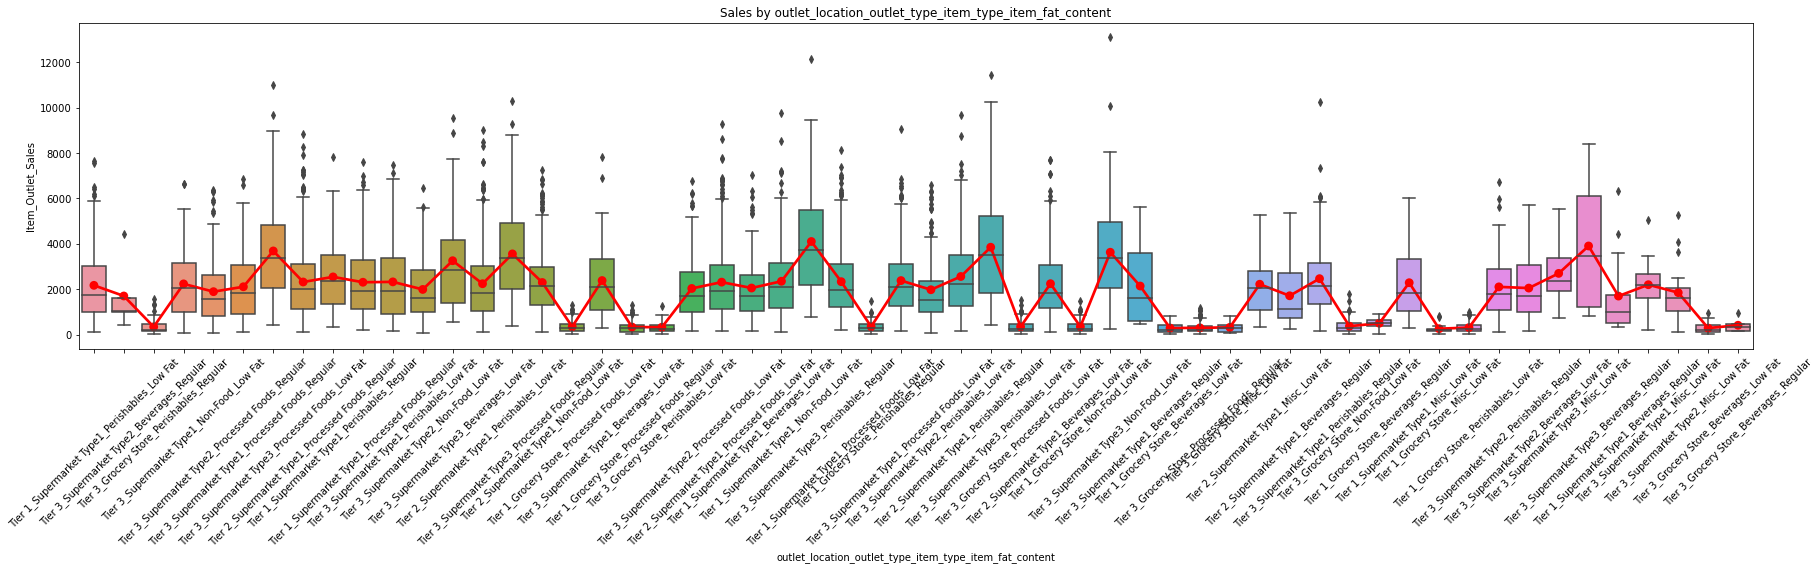

In [34]:

plt.figure(figsize=(30, 6))
sns.boxplot(x='outlet_location_outlet_type_item_type_item_fat_content', y='Item_Outlet_Sales', data=df_train)
plt.title("Sales by outlet_location_outlet_type_item_type_item_fat_content")
sns.pointplot(x='outlet_location_outlet_type_item_type_item_fat_content', y='Item_Outlet_Sales', data=df_train, color='red', ci=None)
plt.xticks(rotation=45)
plt.show()

In [35]:
# df_train['outlet_location_outlet_type_item_type_item_fat_content'].value_counts()


Feature: Outlet_Age

In [36]:

df_train['Outlet_Age'] = datetime.now().year - df_train['Outlet_Establishment_Year']
df_test['Outlet_Age'] = datetime.now().year - df_test['Outlet_Establishment_Year']


In [37]:
df_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Item_Outlet_Sales,Item_Code,Log_Sales,Is_Visibility_Zero,Log_Visibility,Item_Type_Cluster,outlet_type_item_type,outlet_location_outlet_type_item_type,outlet_location_outlet_type_item_type_item_fat_content,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,...,3735.1380,FDA,8.225808,0,0.015920,Perishables,Supermarket Type1_Perishables,Tier 1_Supermarket Type1_Perishables,Tier 1_Supermarket Type1_Perishables_Low Fat,26
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,...,443.4228,DRC,6.096776,0,0.019095,Beverages,Supermarket Type2_Beverages,Tier 3_Supermarket Type2_Beverages,Tier 3_Supermarket Type2_Beverages_Regular,16


Feature: Item_MRP_Bins

In [38]:
df_train['Item_MRP_Bin'] = pd.cut(
    df_train['Item_MRP'],
    bins=[0, 70, 140, 200, df_train['Item_MRP'].max()],
    labels=['Low', 'Medium', 'High', 'Very High']
)

df_test['Item_MRP_Bin'] = pd.cut(
    df_test['Item_MRP'],
    bins=[0, 70, 140, 200, df_train['Item_MRP'].max()],
    labels=['Low', 'Medium', 'High', 'Very High']
)



In [39]:
df_train['Item_MRP_Bin'].value_counts()

High         2964
Medium       2778
Very High    1440
Low          1341
Name: Item_MRP_Bin, dtype: int64

Feature: Item_Profile

In [40]:
df_train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [41]:
df_train['Item_Profile'] = (df_train['Item_Code'] + '_' + df_train['Item_Type'] + '_' + df_train['Item_Type_Cluster'])
df_test['Item_Profile'] = (df_test['Item_Code'] + '_' + df_test['Item_Type'] + '_' + df_test['Item_Type_Cluster'])



In [42]:
df_train['Item_Profile'].value_counts()

FDL_Snack Foods_Processed Foods          67
FDX_Fruits and Vegetables_Perishables    66
FDT_Fruits and Vegetables_Perishables    63
FDX_Snack Foods_Processed Foods          62
FDR_Fruits and Vegetables_Perishables    60
                                         ..
FDP_Dairy_Perishables                     5
DRK_Dairy_Perishables                     5
FDF_Seafood_Perishables                   5
FDZ_Starchy Foods_Processed Foods         3
FDI_Starchy Foods_Processed Foods         3
Name: Item_Profile, Length: 306, dtype: int64

The Feature Item Profile has significantly improved the frequency of categories. There are few categories which still have low count. We will label these as Rare as they occur in a very small number.

Feature : Item_Profile_Freq_Bin

In [43]:
profile_counts = df_train['Item_Profile'].value_counts()
df_train['Item_Profile_Freq'] = df_train['Item_Profile'].map(profile_counts)
df_test['Item_Profile_Freq'] = df_test['Item_Profile'].map(profile_counts)
df_test['Item_Profile_Freq'].fillna(0, inplace=True)

bins = [0, 5, 15, 30, profile_counts.max()]
labels = ['Very Rare', 'Rare', 'Common', 'Very Common']

df_train['Item_Profile_Freq_Bin'] = pd.cut(df_train['Item_Profile_Freq'], bins=bins, labels=labels)
df_test['Item_Profile_Freq_Bin'] = pd.cut(df_test['Item_Profile_Freq'], bins=bins, labels=labels)



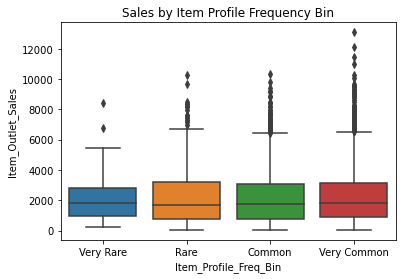

In [44]:
sns.boxplot(x='Item_Profile_Freq_Bin', y='Item_Outlet_Sales', data=df_train)
plt.title('Sales by Item Profile Frequency Bin')
plt.show()


Conclusion: The feature above is not a strong feature for predicting the sales as the median across all categories is similar.

Feature: Freq_Bin_Item_Cluster

We try to find out if the feature item_profile_freq_bin together with some other feature shows good variance in sales.

<AxesSubplot:xlabel='Item_Profile_Freq_Bin', ylabel='Item_Outlet_Sales'>

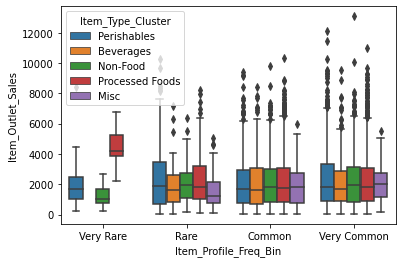

In [45]:
sns.boxplot(x='Item_Profile_Freq_Bin', y='Item_Outlet_Sales', hue='Item_Type_Cluster', data=df_train)


<AxesSubplot:xlabel='Item_Profile_Freq_Bin', ylabel='Item_Outlet_Sales'>

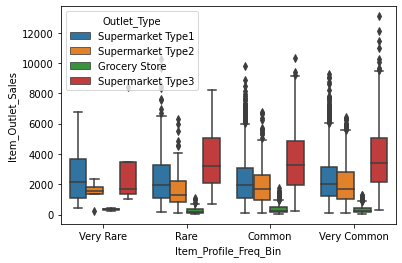

In [46]:
sns.boxplot(x='Item_Profile_Freq_Bin', y='Item_Outlet_Sales', hue='Outlet_Type', data=df_train)


Conclusion: Good Variance is observed when combined with the feature Outlet_type

In [47]:
df_train['Freq_Bin_Item_Cluster'] = df_train['Item_Profile_Freq_Bin'].astype(str) + '_' + df_train['Outlet_Type']
df_test['Freq_Bin_Item_Cluster'] = df_test['Item_Profile_Freq_Bin'].astype(str) + '_' + df_test['Outlet_Type']


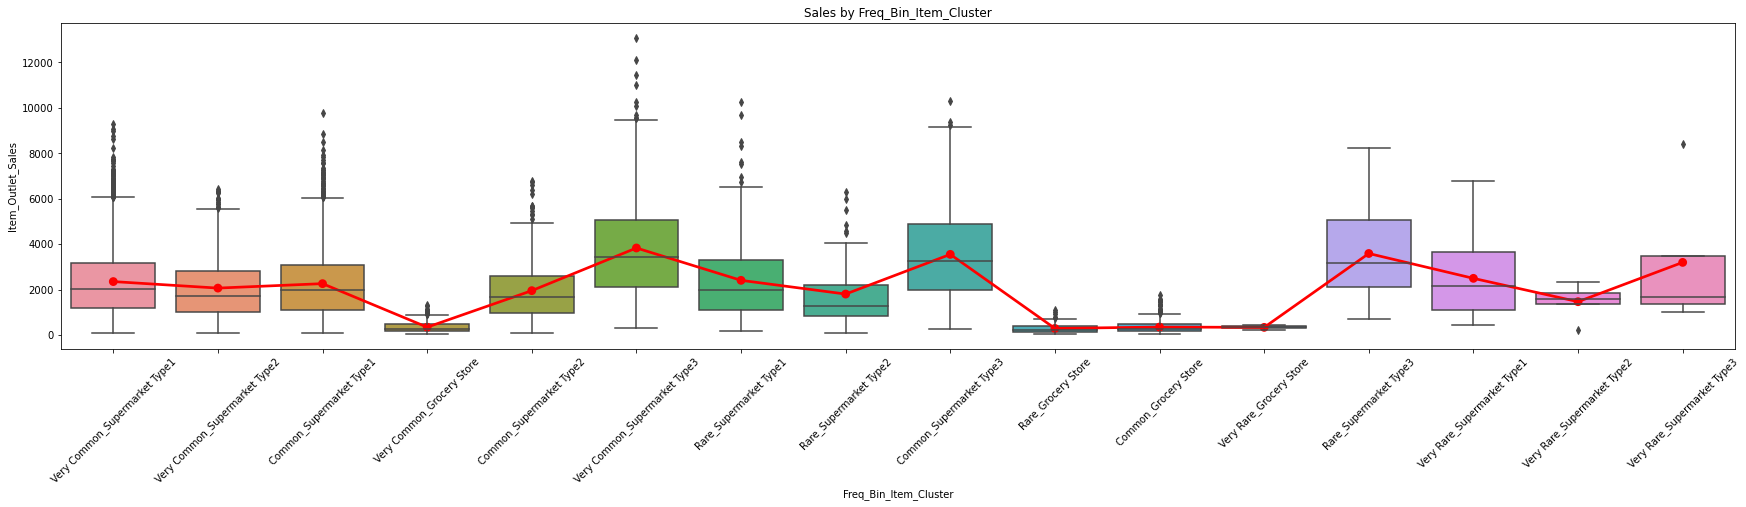

In [48]:

plt.figure(figsize=(30, 6))
sns.boxplot(x='Freq_Bin_Item_Cluster', y='Item_Outlet_Sales', data=df_train)
plt.title("Sales by Freq_Bin_Item_Cluster")
sns.pointplot(x='Freq_Bin_Item_Cluster', y='Item_Outlet_Sales', data=df_train, color='red', ci=None)
plt.xticks(rotation=45)
plt.show()

In [49]:
df_train.to_csv('data/enhanced_train.csv')
df_test.to_csv('data/enhanced_test.csv')